# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Néstor Campos Gestal<br>
Link: https://drive.google.com/file/d/1fgfvXE8fmQIeyt5dhHy0fsykM33KMku3/view?usp=sharing <br>
Github: https://github.com/nestorcamposgestal/03MIAR---Algoritmos-de-Optimizacion---Nestor
<br>


Problema:
 1. Sesiones de doblaje <br>
 2. Organizar los horarios de partidos de La Liga<br>
 3. Combinar cifras y operaciones

## Descripción del problema
* El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.
* Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)
* Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo sería para obtener el 4:

$$4+2-6/3*1=4$$

* Es obligatorio usar siempre los 4 operadores y solo podemos usar las cifras del 1 al 9 sin repetir ninguna de ellas

Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:

- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?

- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?





                                        

## 1. ¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br> 
Sin tener en cuenta las restricciones, es decir que se pueden repetir tanto los números como los operadores. Tenemos 9 cifras y 4 operadores, por lo que el número de todas las posibilidades sería la variación con repetición de 9 elementos, de los que solo podemos coger 5 elementos correspondientes a las cifras y la variación con repetición de 4 elementos correspondientes a los operadores. Es decir:

$$9^5 * 4^4 = 59.049 * 256 = 15.116.544$$

Por lo tanto, hay 15.116.544 posibilidades sin tener en cuenta las restricciones.

## 2. ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

Teniendo en cuenta las restricciones de que no se pueden repetir cifras ni operadores y que debemos usar los cuatro operadores básicos en todas las expresiones. Para el caso de los operadores seguiremos teniendo una permutación de 4 elementos que no se podrá repetir mientras que ahora las cifras tampoco se podrán repetir, por que usaremos una variación sin repetición.

$$\frac{9!}{(9-5)!} * 4! = 15.120 * 24 = 362.880$$

Por lo tanto, hay 362.880 posibilidades teniendo en cuenta las restricciones.

## 3.Modelo para el espacio de soluciones.
#### ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)

Como el problema implica manipular y combinar diferentes elementos, en este caso, 9 cifras y 4 operadores, la estructura de datos mas adecuada para el prpblema creo que es la siguiente.

Tanto los dígitos como los operadores pueden estar contenidoes es un vector o en una lista. Por ejemplo:

```python
numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9]
operadores = ['+', '-', '*', '/']
```

Después, podríamos generar todas las posibles combinaciones de cifras y operadores a través de permutaciones y variaciones de estos vectores.

Principalmente escogo este modelado de datos con listas porque nos permite acceder fácilmente a elementos específicos y recorrerlos en orden. Además, la manipulación de vectores o listas es una operación eficiente en términos de tiempo y memoria.

## Según el modelo para el espacio de soluciones.
## 4. ¿Cual es la función objetivo? ¿Es un problema de maximización o minimización?

En este caso, no hay una función objetivo como en los problemas de optimización, ya que este no es un problema de optimización, sino un problema de búsqueda y tendremos que encontrar todas las combinaciones posibles de las 9 cifras y los 4 operadores para obtener una cierta cantidad.

## 5. Diseña un algoritmo para resolver el problema por fuerza bruta
Para hacer este algoritmo de fuerza bruta para rsolver el probelma, generaremos todas las posibles combinaciones de numeros y operadores, teniendo en cuenta que no se pueden repetir. Para ellos usaremos las funciones de `permutation` y `combinations` de python.

Podemos observar 3 funciones en este algoritmo:
- `generar_expresiones`: genera todas las posibles expresiones que puede haber haciendo todas las permutaciones y combinaciones posibles. Quiero destacar aquí que hago uso de las funciones generadoras para mejorar un poco la eficiencia de este algoritmo por fuerza bruta, que lo que hace es que con la sentencia `yield`, se devuelven los valores generados a medida que se llama a esta funcion, en vez de almacenar en un array todas las expresiones generadas. De esta manera se ahorra mucha memoria y es mucho más eficiente
- `encontrar_soluciones`: mira que la expresión que se genera de el valor que se desea
- `evaluar_expresion`: usa la función `eval` para sacar el valor de la operación de la cadena de string

In [6]:
from itertools import permutations, combinations

# Evalúa una expresión matemática y devuelve su resultado
def evaluar_expresion(expresion):
    return eval(expresion)

# Genera todas las posibles expresiones matemáticas con las cifras y operadores dados. Se usan funciones generadoras!
def generar_expresiones(numeros, operadores):
    for numero in combinations(numeros, 5):
        for operador in permutations(operadores):
            expresion = str(numero[0])
            for i in range(len(operadores)):
                expresion += operador[i] + str(numero[i+1])
            yield expresion

# Encuentra todas las expresiones que dan como resultado el objetivo
def encontrar_soluciones(numeros, operadores, objetivo):
    soluciones = []
    for expresion in generar_expresiones(numeros, operadores):
        resultado = evaluar_expresion(expresion)
        if resultado == objetivo:
            soluciones.append(expresion)
    return soluciones

In [7]:
# Ejemplo
numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9]
operadores = ['+', '-', '*', '/']
soluciones = encontrar_soluciones(numeros,operadores,4)
print(soluciones)

['1-2/3*6+7', '1/2*4-5+7', '1/2*4-6+8', '1/2*4-7+9', '1/2*6-7+8', '1/2*6-8+9', '1-3+4/6*9', '1-3/4*8+9', '1/3*6-7+9', '2/4*6-7+8', '2/4*6-8+9', '3*4/6-7+9']


## 6. Calcula la complejidad del algoritmo por fuerza bruta
La complejidad del algoritmo depende de la cantidad de permutaciones y combinaciones que se generan. En este caso, estamos generando todas las varciones de 9 cifras y todas las permutaciones de 4 operadores, por lo que la complejidad es de $O(\frac{9!}{(9-5)!} * 4!)$, lo cual resultan ser muchas operaciones.

Se puede concluir que la complejidad total del algoritmo es de orden factorial $O(n!)$.

## 7. Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

En este caso, para poder mejorar la eficiencia del algoritmo de fuerza bruta implementado anteriormente, usaremos un algoritmo de backtracking donde iremos ramificando cada uno de los números posibles para cada uno de los operadores. Podemos ver un ejemplo del árbol en la siguiente imagen.

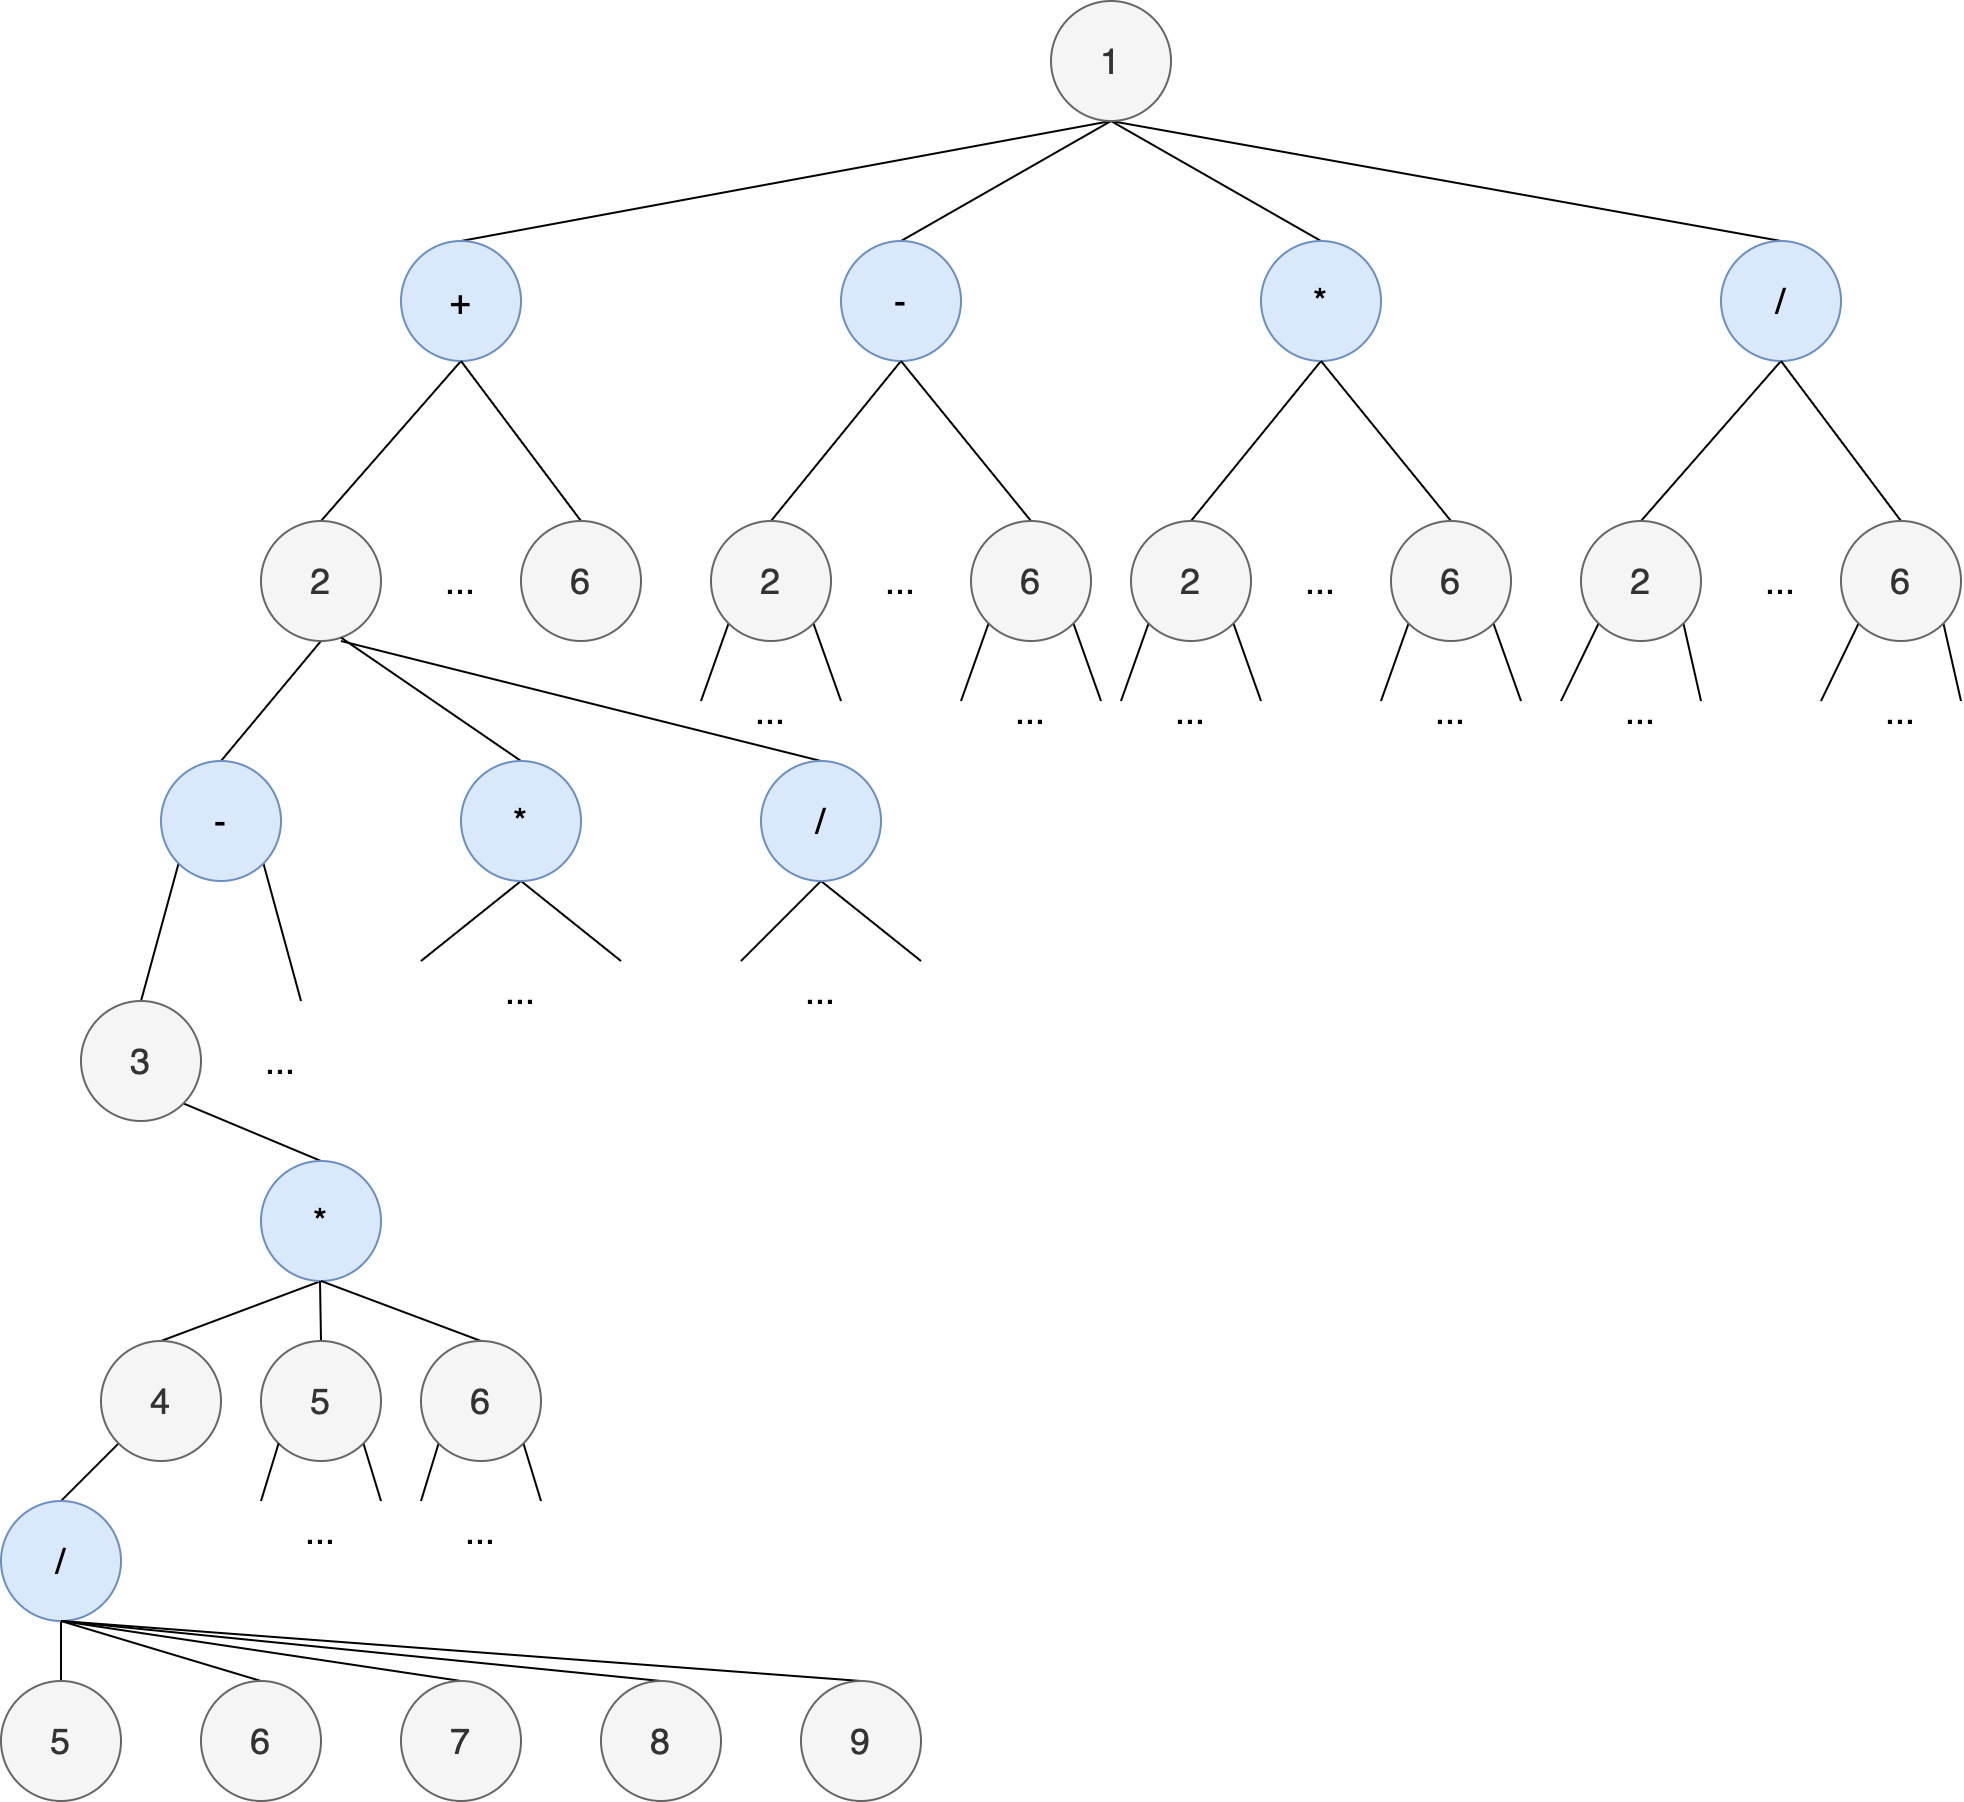

En esta figura podemos ver como se desarrollaría el árbol para cada una de las posibilidades usando el ejemplo propuesto anteriormente de:

```python
numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9]
operadores = ['+', '-', '*', '/']
```

En el desarrollo del algoritmo, primero iteramos sobre la lista de números (ramificamos los números), comprobamos si la expresión que ya tenemos es válida, en caso contrario añadimos un operador y volvemos a iterar sobre los números restantes haciendo una llamada recursiva a la función. De esta manera lo que estamos haciendo es ir avanza sobre el árbol.

En el caso de que se haya llegado al final del árbol, es decir, no se pueden utilizar más operadores se vuelve hacia atrás para probar con otra solución. Claramente, esta es la estructura de backtracking.

In [8]:
def backtracking(expresion,numeros, operadores, objetivo):
    # Ramificar para añadir una cifra a la expresión
    for numero in numeros:
        numeros_restantes = numeros.copy()
        numeros_restantes.remove(numero)
        expresion_numero = f'{expresion}{numero}'

        # Comprobar si la expresión actual es una solución válida.
        if len(expresion_numero)>0 and eval(expresion_numero) == objetivo and len(operadores) == 0:
            return expresion_numero # Solución encontrada!

        # Retornamos 0 si ya hemos usado todos los operadores y hemos probado todos los números posibles
        elif len(operadores) == 0 and numero == numeros[-1]:
            return 0

        # Ramificamos para añadir un operador a la expresión
        for operador in operadores:
            nueva_expresion = f'{expresion_numero}{operador}'
            operadores_restantes = operadores.copy()
            operadores_restantes.remove(operador)

            mejor_solucion = backtracking(nueva_expresion, numeros_restantes, operadores_restantes, objetivo)

            # En caso de tener una solución, el valor retornado será la cadena con la operación matemática
            if mejor_solucion != 0:
                return mejor_solucion
    return 0

In [9]:
# Ejemplo
numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9]
operadores = ['+', '-', '*', '/']
soluciones = backtracking('',numeros,operadores,4)
print(soluciones)

1+3*8/2-9


## 8. Calcula la complejidad del algoritmo
La complejidad de este algoritmo en este caso va a depender obviamente del tamaño del espacio de búsqueda. En este caso tenemos el conjunto de números y operadores.

Suponiendo que tenemos N números y M operadores, en el peor de los casos, el algoritmo debe explorar todo el espacio de búsqueda, lo que implica visitar cada nodo del árbol de backtracking. Por lo tanto, la complejidad del algoritmo de backtracking es exponencial en el peor de los casos, $O(N^M)$ o $O(2^n)$.

## 9. Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios. Aplica el algoritmo al juego de datos generado
Para este ejercicio, crearemos distintos valores de números que entrarán en el input del algoritmo. Usaremos los mismos operadores y el objetivo a encontrar también será aleatorio. También se medirá el tiempo que lleva correr el algoritmo para cada caso.

Al final de todo todos estos datos se resumen en un DataFrame, donde podemos ver que la ejecución del algoritmo para los diferentes casos es bastante buena. Y medida que los números que se usan son más grande, el algoritmo tarda más en encontrar una solución. Esto es debido a que obviamente es más difícil operar con número muy grandes que con números pequeños.

In [10]:
import random
import pandas as pd
import time

operadores = ['+', '-', '*', '/']
resultados = {'solucion': [], 'numeros': [], 'operadores': [], 'objetivo': [], 'tiempo': []}

# Generamos 5 listas de números aleatorios con objetivos aleatorios entre 50 y 150
for i in range(10):
    numeros = random.sample(range(50, 200), 15)  # Elegimos 5 números aleatorios entre 1 y 20
    objetivo = random.randint(50, 150)  # Elegimos un objetivo aleatorio entre 50 y 150

    inicio = time.time()  # Guardamos el tiempo de inicio
    solucion = backtracking('',numeros, operadores, objetivo)
    fin = time.time()  # Guardamos el tiempo de finalización
    duracion = fin - inicio  # Calculamos la duración de la ejecución

    # Añadimos los resultados al diccionario
    resultados['solucion'].append(solucion)
    resultados['numeros'].append(numeros)
    resultados['operadores'].append(operadores)
    resultados['objetivo'].append(objetivo)
    resultados['tiempo'].append(duracion)

# Creamos el DataFrame a partir del diccionario de resultados
df_resultados = pd.DataFrame(resultados)

# Mostramos el DataFrame
display(df_resultados)


,solucion,numeros,operadores,objetivo,tiempo
0,89+168*110/105-164,"[89, 136, 58, 127, 50, 167, 168, 110, 77, 96, ...","[+, -, *, /]",101,0.529289
1,199+56*145/58-189,"[199, 141, 56, 116, 150, 145, 189, 187, 194, 6...","[+, -, *, /]",150,0.150039
2,80+110*91/77-97,"[80, 167, 110, 77, 175, 145, 150, 188, 164, 18...","[+, -, *, /]",113,0.151392
3,151+94-110*144/90,"[151, 120, 105, 61, 94, 110, 147, 144, 170, 14...","[+, -, *, /]",69,0.628177
4,125+75*171/135-134,"[125, 181, 135, 75, 104, 188, 134, 96, 79, 76,...","[+, -, *, /]",86,0.541788
5,82+89*180/90-161,"[82, 89, 140, 191, 99, 90, 160, 154, 180, 161,...","[+, -, *, /]",99,0.109480
6,0,"[139, 137, 181, 135, 86, 119, 173, 147, 192, 6...","[+, -, *, /]",143,90.119300
7,57+175-80*152/128,"[128, 57, 80, 89, 182, 175, 51, 166, 61, 79, 1...","[+, -, *, /]",137,5.829548
8,145+68*54/102-73,"[145, 68, 127, 146, 92, 77, 112, 158, 54, 103,...","[+, -, *, /]",108,0.056986
9,111+160-133*138/114,"[111, 149, 135, 128, 83, 102, 101, 114, 133, 1...","[+, -, *, /]",110,0.921138


## 10. Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

- [Algoritmos de Backtracking. Instituto Politécnico Nacional](https://docencia.eafranco.com/materiales/estructurasdedatos/07/Tema07.pdf)
- Diapositivas y apuntes de clase
- Documentación de Python

## 11. Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Para avanzar en el estudio del problema, se pueden considerar diferentes enfoques y variaciones, como por ejemplo:

1. Variación del objetivo: En lugar de buscar una única cantidad dada, se puede plantear el problema de encontrar todas las posibles combinaciones que den como resultado una cantidad determinada o un rango de cantidades en el caso que he hecho de la implementación del algoritmo de backtracking.
2. Variación de las reglas: Se pueden establecer nuevas reglas, como la inclusión de paréntesis en las operaciones o la posibilidad de concatenar cifras para formar números mayores.
3. Variación del tamaño: Para aumentar la complejidad del problema, se puede aumentar el número de cifras y operadores disponibles. También se puede aumentar la cantidad de objetivos a encontrar.
4. Enfoque heurístico: Se pueden aplicar técnicas heurísticas para reducir el espacio de búsqueda y encontrar soluciones cercanas a la óptima de manera más eficiente.
5. Implementación de algoritmos más avanzados: Además del backtracking, se pueden implementar otros algoritmos como programación dinámica o algoritmos genéticos para resolver el problema.
6. Implementación de un buen método de poda: Además de haber implementado el algoritmo de backtracking, se puede implementar el algoritmo de ramificación y poda que es muy semejante a este, pero habrá que tener un especial cuidado a la hora de hacer la poda, ya que hay que tener en cuenta las operaciones que quedan por hacer, porque puede variar mucho el resultado.

En general, para avanzar en el estudio del problema se pueden explorar diferentes enfoques y variaciones, y se pueden aplicar técnicas avanzadas para mejorar la eficiencia de la solución.